In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\clicklabs\\Downloads\\US_Heart_Patients.csv')
df.sample(frac = 1, random_state = 3)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df = df.fillna(method = 'ffill')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


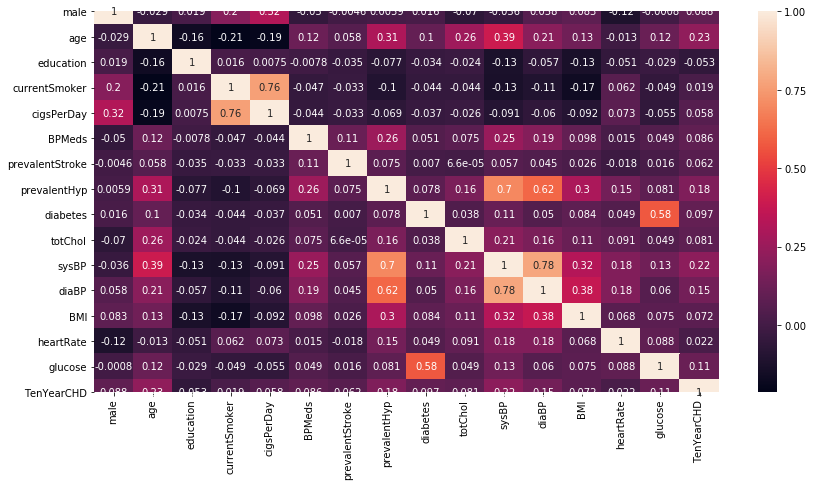

In [6]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(),annot = True)

In [7]:
df0 = df[df['TenYearCHD']==0]
df1 = df[df['TenYearCHD']==1]

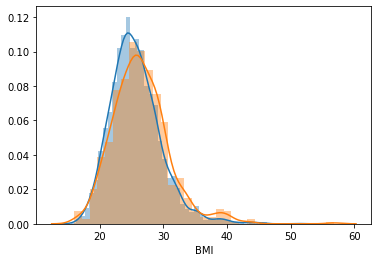

In [8]:
sns.distplot(df0['BMI'])
sns.distplot(df1['BMI'])
plt.show()

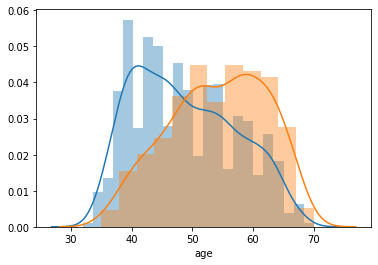

In [9]:
sns.distplot(df0['age'])
sns.distplot(df1['age'])
plt.show()

In [11]:
import statsmodels.api as sm
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis = 1)
Xc = sm.add_constant(X)

C:\Users\clicklabs\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index = Xc.columns, columns = ['vif'])

,vif
const,195.577022
male,1.196376
age,1.372623
education,1.052969
currentSmoker,2.495886
cigsPerDay,2.622972
BPMeds,1.099504
prevalentStroke,1.018958
prevalentHyp,2.052190
diabetes,1.509896


In [13]:
model = sm.Logit(y,Xc,random_state = 3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Mar 2020   Pseudo R-squ.:                  0.1107
Time:                        15:02:03   Log-Likelihood:                -1606.2
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.904e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9749      0.659    -12.106      0.000      -9.266      -6.684
male                0.5094      0.100      5.076      0.000       0.313       0.706
age                 0.0620      0.006      9.972      0.000       0.050       0.074
education          -0.0156      0.046     -0.343      0.731      -0.105       0.074
currentSmoker       0.0139      0.144      0.097      0.923      -0.268       0.296
cigsPerDay          0.0209      0.006      3.681      0.000       0.010       0.032
BPMeds              0.2311      0.219      1.054      0.292      -0.198       0.661
prevalentStroke     0.9706      0.441      2.199      0.028       0.106       1.836
prevalentHyp        0.2346      0.128      1.828      0.068      -0.017       0.486
diabetes            0.3055      0.281      1.086      0.278      -0.246       0.857
totChol             0.0017      0.001      1.711      0.087      -0.000       0.004
sysBP               0.0142      0.004      4.012      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.477      0.633      -0.015       0.009
BMI                 0.0019      0.012      0.162      0.872      -0.021       0.025
heartRate          -0.0014      0.004     -0.354      0.723      -0.009       0.006
glucose             0.0055      0.002      2.794      0.005       0.002       0.009
===================================================================================
"""

In [14]:
p = model.pvalues
cols = list(Xc.columns)
while len(cols)>1:
    X_1 = Xc[cols]
    model = sm.Logit(y,X_1,random_state = 3).fit()
    p = model.pvalues
    max_p = max(p)
    feature_maxp = p.idxmax()
    
    if max_p>0.05:
        print('\n')
        print('removed feature: ', feature_maxp, 'pvalue: ', max_p)
        cols.remove(feature_maxp)
    else:
        break
        
print(cols)

Optimization terminated successfully.
         Current function value: 0.378831
         Iterations 7


removed feature:  currentSmoker pvalue:  0.9230836384454568
Optimization terminated successfully.
         Current function value: 0.378832
         Iterations 7


removed feature:  BMI pvalue:  0.8799600997167144
Optimization terminated successfully.
         Current function value: 0.378834
         Iterations 7


removed feature:  heartRate pvalue:  0.7256836903790043
Optimization terminated successfully.
         Current function value: 0.378849
         Iterations 7


removed feature:  education pvalue:  0.7258343500756252
Optimization terminated successfully.
         Current function value: 0.378864
         Iterations 7


removed feature:  diaBP pvalue:  0.6189568890550994
Optimization terminated successfully.
         Current function value: 0.378893
         Iterations 7


removed feature:  BPMeds pvalue:  0.2839466361427202
Optimization terminated successfully.
         Cu

In [15]:
model = sm.Logit(y, Xc[cols], random_state = 3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.379946
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Sat, 07 Mar 2020   Pseudo R-squ.:                  0.1080
Time:                        15:03:09   Log-Likelihood:                -1611.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 3.457e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4018      0.387    -21.723      0.000      -9.160      -7.644
male                0.4911      0.097      5.057      0.000       0.301       0.681
age                 0.0646      0.006     10.922      0.000       0.053       0.076
cigsPerDay          0.0211      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0512      0.436      2.411      0.016       0.197       1.906
sysBP               0.0172      0.002      8.576      0.000       0.013       0.021
glucose             0.0068      0.002      4.370      0.000       0.004       0.010
===================================================================================
"""

In [17]:
pd.DataFrame({'coef':model.params, 'exp_b': np.exp(model.params)})

,coef,exp_b
const,-8.401794,0.000224
male,0.491120,1.634145
age,0.064620,1.066753
cigsPerDay,0.021130,1.021355
prevalentStroke,1.051193,2.861061
sysBP,0.017156,1.017304
glucose,0.006751,1.006774


In [25]:
prob = model.predict(Xc[cols])
prob

0       0.045124
1       0.055181
2       0.151048
3       0.364153
4       0.105343
          ...   
4235    0.114107
4236    0.076506
4237    0.116199
4238    0.081596
4239    0.081216
Length: 4240, dtype: float64

In [28]:
prob = pd.DataFrame(prob, columns=['prob'])

In [29]:
prob.head()

,prob
0,0.045124
1,0.055181
2,0.151048
3,0.364153
4,0.105343


In [30]:
prob['y_est'] = prob['prob'].apply(lambda x: 1 if x>=0.5 else 0)

In [31]:
prob

,prob,y_est
0,0.045124,0
1,0.055181,0
2,0.151048,0
3,0.364153,0
4,0.105343,0
...,...,...
4235,0.114107,0
4236,0.076506,0
4237,0.116199,0
4238,0.081596,0


In [34]:
prob['y'] = y.values
prob.head()

,prob,y_est,y
0,0.045124,0,0
1,0.055181,0,0
2,0.151048,0,0
3,0.364153,0,1
4,0.105343,0,0


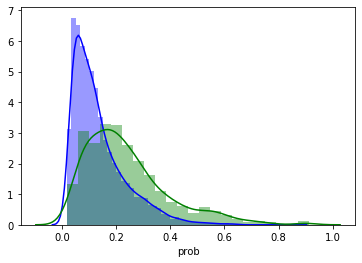

In [35]:
df0 = prob[prob['y']==0]
df1 = prob[prob['y']==1]

sns.distplot(df0['prob'], color = 'b')
sns.distplot(df1['prob'], color = 'g')
plt.show()

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [37]:
confusion_matrix(y, prob['y_est'])

array([[3571,   25],
       [ 593,   51]], dtype=int64)

In [38]:
accuracy_score(y, prob['y_est'])

0.8542452830188679

In [40]:
print(classification_report(y, prob['y_est']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3596
           1       0.67      0.08      0.14       644

    accuracy                           0.85      4240
   macro avg       0.76      0.54      0.53      4240
weighted avg       0.83      0.85      0.80      4240



In [41]:
# roc analysis

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve

In [43]:
roc_auc_score(y, prob['prob'])

0.728857417489412

In [44]:
fpr, tpr, thresholds = roc_curve(y,prob['prob'])

In [46]:
print(fpr)
print(tpr)

[0.         0.         0.         ... 0.99805339 0.99805339 1.        ]
[0.         0.0015528  0.00465839 ... 0.9984472  1.         1.        ]


In [48]:
score = pd.DataFrame({'fpr':fpr,'tpr':tpr, 'thresholds':thresholds})
score.head()

,fpr,tpr,thresholds
0,0.000000,0.000000,1.911025
1,0.000000,0.001553,0.911025
2,0.000000,0.004658,0.889666
3,0.000278,0.004658,0.850968
4,0.000278,0.020186,0.663183


Text(0, 0.5, 'tpr')

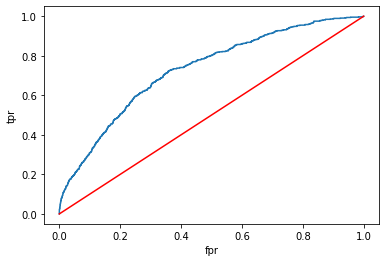

In [49]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

<function matplotlib.pyplot.show(*args, **kw)>

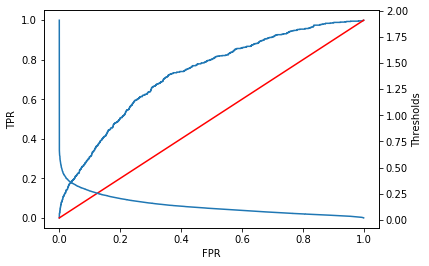

In [50]:
fig, ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds)
ax1.set_ylabel('Thresholds')
plt.show

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

In [53]:
print(X_train.shape, X_test.shape)

(2968, 15) (1272, 15)


Accuracy score- train:  0.851078167115903
Confusion matrix- train:  [[2504    9]
 [ 433   22]]
AUC Score-Train:  0.7239768587958003


Accuracy score- train:  0.8553459119496856
Confusion matrix- train:  [[1083    0]
 [ 184    5]]
AUC Score-Train:  0.729240254632683


Text(0, 0.5, 'tpr')

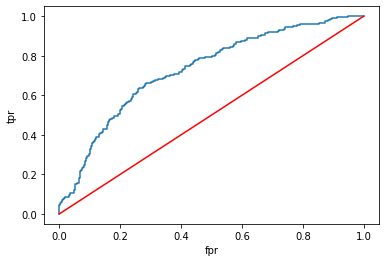

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True, solver = 'liblinear')
lr.fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]

print('Accuracy score- train: ', accuracy_score(y_train,y_train_pred))
print('Confusion matrix- train: ',confusion_matrix(y_train,y_train_pred))
print('AUC Score-Train: ', roc_auc_score(y_train,y_train_prob))
print('\n')

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]

print('Accuracy score- train: ', accuracy_score(y_test,y_test_pred))
print('Confusion matrix- train: ',confusion_matrix(y_test,y_test_pred))
print('AUC Score-Train: ', roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')


In [57]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,86.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion Matrix - Train:  
 [[2513    0]
 [   0  455]]
Overall Accuracy - Train:  1.0
AUC - Train:  1.0


Confusion Matrix - Test:  
 [[924 159]
 [139  50]]
Overall Accuracy - Test:  0.7657232704402516
AUC - Test:  0.5588679300590658


Text(0, 0.5, 'tpr')

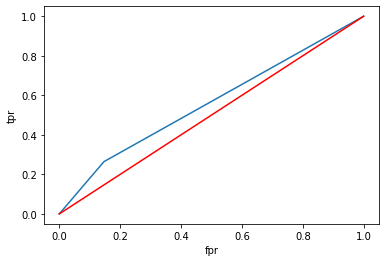

In [65]:
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [66]:
## hyperparameter tuning using grid search cv

In [69]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

params = {'max_depth': [2,3,4,5,6], 'min_samples_leaf':[1,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6,7,8,9,10]
         ,'criterion':['gini','entropy']}

gsearch = GridSearchCV(dtc, param_grid=params, cv = 3, scoring='roc_auc')
gsearch.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [70]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Confusion Matrix - Train:  
 [[2508    5]
 [ 443   12]]
Overall Accuracy - Train:  0.8490566037735849
AUC - Train:  0.7150378471508595


Confusion Matrix - Test:  
 [[1079    4]
 [ 189    0]]
Overall Accuracy - Test:  0.8482704402515723
AUC - Test:  0.6742514180187309


Text(0, 0.5, 'tpr')

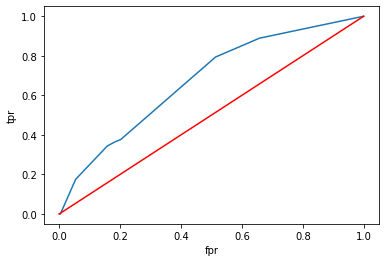

In [72]:
dt = DecisionTreeClassifier(**gsearch.best_params_)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [73]:
# hyperparameter tuning using random search cv

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
dtc = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,20),'min_samples_leaf': sp_randint(1,20),
         'min_samples_split': sp_randint(2,40),'criterion': ['gini','entropy']}

rsearch = RandomizedSearchCV(dtc, param_distributions=params, cv = 3, random_state = 3, scoring = 'roc_auc',n_iter = 100)
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

Confusion Matrix - Train:  
 [[2508    5]
 [ 443   12]]
Overall Accuracy - Train:  0.8490566037735849
AUC - Train:  0.7150378471508595


Confusion Matrix - Test:  
 [[1079    4]
 [ 189    0]]
Overall Accuracy - Test:  0.8482704402515723
AUC - Test:  0.6742514180187309


Text(0, 0.5, 'tpr')

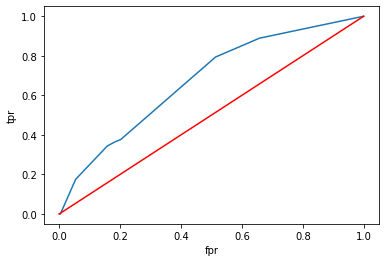

In [76]:
dt = DecisionTreeClassifier(**rsearch.best_params_)

dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')


In [78]:
df1 = pd.read_csv('telco_chrun_encoded.csv')
df1.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,0,29.850000,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,0,55.573529,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,108.15,1,54.075000,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1840.75,0,40.905556,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,151.65,1,75.825000,1,0,0,0,0,1,0


In [79]:
df1 = df1.sample(frac = 1,random_state = 3)
y = df1['churn']
X = df1.drop('churn',axis = 1)

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 3)

Confusion Matrix - Train:  
 [[3589    2]
 [   4 1327]]
Overall Accuracy - Train:  0.9987809833401057
AUC - Train:  0.999967884482891


Confusion Matrix - Test:  
 [[1409  163]
 [ 265  273]]
Overall Accuracy - Test:  0.7971563981042654
AUC - Test:  0.8299877266664775


Text(0, 0.5, 'tpr')

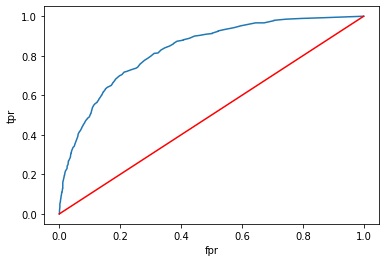

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr') ##overfit mode

In [82]:
rfc = RandomForestClassifier()

params = {'n_estimators': sp_randint(50,200),'max_features': sp_randint(1,24), 'max_depth': sp_randint(2,10)
         ,'min_samples_split': sp_randint(2,20), 'min_samples_leaf':sp_randint(1,20), 'criterion':['gini','entropy']}

rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 3, n_iter = 200, scoring='roc_auc', random_state=3, return_train_score=True)
rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [83]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 15,
 'min_samples_split': 12,
 'n_estimators': 57}

Confusion Matrix - Train:  
 [[3317  274]
 [ 653  678]]
Overall Accuracy - Train:  0.8116619260463226
AUC - Train:  0.8718787535664438


Confusion Matrix - Test:  
 [[1432  140]
 [ 278  260]]
Overall Accuracy - Test:  0.8018957345971564
AUC - Test:  0.8407523151432598


Text(0, 0.5, 'tpr')

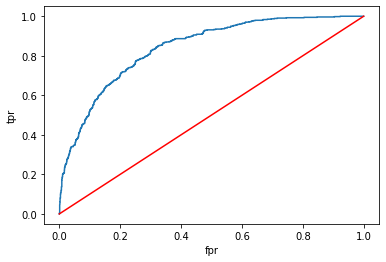

In [84]:
rfc = RandomForestClassifier(**rsearch_rfc.best_params_)

rfc.fit(X_train,y_train)

rfc.fit(X_train,y_train)

y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [89]:
imp = pd.DataFrame(rfc.feature_importances_, index = X.columns, columns = ['imp'])
imp = imp.sort_values(by = 'imp',ascending = False)
imp

,imp
tenure,0.178757
total_charges,0.138558
internet_service-fiber_optic,0.092472
monthly_charges,0.089176
avg_monthly_charges,0.083703
payment_method-electronic_check,0.079371
contract-two_year,0.078902
online_security,0.045551
internet_service-no,0.041583
tech_support,0.033590


In [92]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,86.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [93]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis = 1)

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 3)

## Undesampling

In [99]:
Xytrain = pd.concat([X_train,y_train],axis = 1)
print('before sampling: ', '\n', Xytrain['TenYearCHD'].value_counts())
Xytrain0 =  Xytrain[Xytrain['TenYearCHD'] == 0]
Xytrain1 =  Xytrain[Xytrain['TenYearCHD'] == 1]
 
len0 = len(Xytrain0)
len1 = len(Xytrain1)

Xytrain0_us = Xytrain0.sample(len1, random_state = 3)
Xytrain_us = pd.concat([Xytrain0_us,Xytrain1], axis = 0)
print('\n')
print('after sampling: ', '\n', Xytrain_us['TenYearCHD'].value_counts())

X_train_us = Xytrain_us.drop('TenYearCHD', axis = 1)
y_train_us = Xytrain_us['TenYearCHD']


before sampling:  
 0    2513
1     455
Name: TenYearCHD, dtype: int64


after sampling:  
 1    455
0    455
Name: TenYearCHD, dtype: int64


Confusion Matrix - Train:  
 [[302 153]
 [146 309]]
Overall Accuracy - Train:  0.6714285714285714
AUC - Train:  0.7314913657770801


Confusion Matrix - Test:  
 [[735 348]
 [ 60 129]]
Overall Accuracy - Test:  0.6792452830188679
AUC - Test:  0.7285709400206171


Text(0, 0.5, 'tpr')

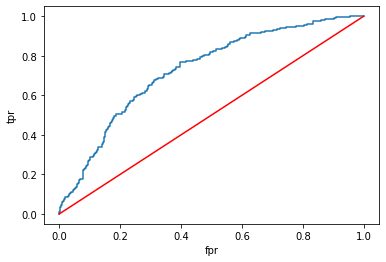

In [100]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train_us,y_train_us)

y_train_pred = lr.predict(X_train_us)
y_train_prob = lr.predict_proba(X_train_us)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train_us, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train_us, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train_us, y_train_prob))
print('\n')

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

## oversampling

In [102]:
Xytrain = pd.concat([X_train,y_train],axis = 1)
print('before sampling: ', '\n', Xytrain['TenYearCHD'].value_counts())
Xytrain0 =  Xytrain[Xytrain['TenYearCHD'] == 0]
Xytrain1 =  Xytrain[Xytrain['TenYearCHD'] == 1]
 
len0 = len(Xytrain0)
len1 = len(Xytrain1)

Xytrain1_os = Xytrain1.sample(len0,replace = True, random_state = 3)
Xytrain_us = pd.concat([Xytrain1_os,Xytrain0], axis = 0)
print('\n')
print('after sampling: ', '\n', Xytrain_us['TenYearCHD'].value_counts())

X_train_us = Xytrain_us.drop('TenYearCHD', axis = 1)
y_train_us = Xytrain_us['TenYearCHD']

before sampling:  
 0    2513
1     455
Name: TenYearCHD, dtype: int64


after sampling:  
 1    2513
0    2513
Name: TenYearCHD, dtype: int64


Confusion Matrix - Train:  
 [[1706  807]
 [ 842 1671]]
Overall Accuracy - Train:  0.6719060883406287
AUC - Train:  0.7319075704862371


Confusion Matrix - Test:  
 [[751 332]
 [ 67 122]]
Overall Accuracy - Test:  0.6863207547169812
AUC - Test:  0.7282094124199388


Text(0, 0.5, 'tpr')

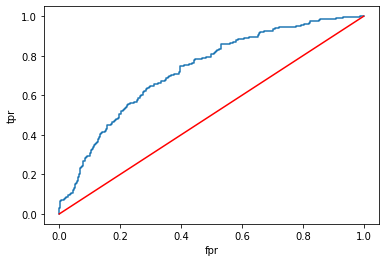

In [103]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train_us,y_train_us)

y_train_pred = lr.predict(X_train_us)
y_train_prob = lr.predict_proba(X_train_us)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train_us, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train_us, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train_us, y_train_prob))
print('\n')

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [104]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [105]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 'minority', random_state=3)

X_train_sm, y_train_sm = smote.fit_sample(X_train,y_train)

Confusion Matrix - Train:  
 [[1691  822]
 [ 839 1674]]
Overall Accuracy - Train:  0.6695185037803422
AUC - Train:  0.7357122192612738


Confusion Matrix - Test:  
 [[744 339]
 [ 87 102]]
Overall Accuracy - Test:  0.6650943396226415
AUC - Test:  0.6749915724984976


Text(0, 0.5, 'tpr')

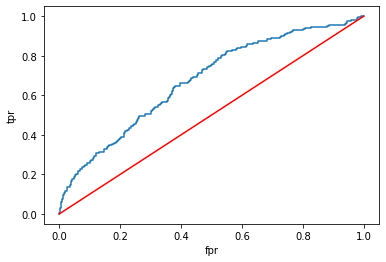

In [106]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train_sm,y_train_sm)

y_train_pred = lr.predict(X_train_sm)
y_train_prob = lr.predict_proba(X_train_sm)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train_sm, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train_sm, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train_sm, y_train_prob))
print('\n')

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [128]:
df2 = pd.read_csv('SMSSpamCollection.csv')
df2.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
df2.Class = df2.Class.map({'ham':0, 'spam':1})
y = df2['Class']
X = df2.sms

In [130]:
df2

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [131]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

In [133]:
vect.fit(X_train)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [134]:
X_traint = vect.transform(X_train)
X_testt = vect.transform(X_test)

In [135]:
X_traint.shape

(3900, 6900)

Confusion Matrix - Train:  
 [[3373   12]
 [  10  505]]
Overall Accuracy - Train:  0.9943589743589744
AUC - Train:  0.995817642081714


Confusion Matrix - Test:  
 [[1433    7]
 [  16  216]]
Overall Accuracy - Test:  0.986244019138756
AUC - Test:  0.9847341954022989


Text(0, 0.5, 'tpr')

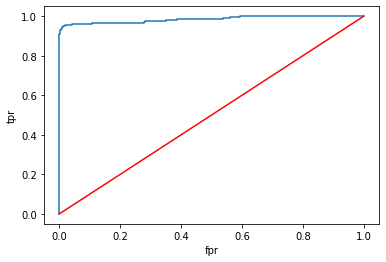

In [136]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_traint,y_train)

y_train_pred = mnb.predict(X_traint)
y_train_prob = mnb.predict_proba(X_traint)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = mnb.predict(X_testt)
y_test_prob = mnb.predict_proba(X_testt)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [137]:
df1 = pd.read_csv('telco_chrun_encoded.csv')
df1.head()
df1 = df1.sample(frac = 1,random_state = 3)
y = df1['churn']
X = df1.drop('churn',axis = 1)

In [143]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)
pd.DataFrame(Xs, columns = [X.columns])

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,monthly_charges,total_charges,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,-0.990658,-0.440327,-0.965608,-0.652305,0.634718,0.327189,-0.854336,-0.633746,-0.725516,-0.723918,...,-1.490774,-0.564191,-1.453509,-0.886896,1.904289,1.943495,-0.561364,-0.525351,-0.711863,-0.543604
1,-0.990658,-0.440327,1.035617,-0.652305,-0.587601,0.327189,1.170500,-0.633746,-0.725516,-0.723918,...,0.993949,-0.262661,0.959973,1.127527,-0.525130,-0.514537,-0.561364,-0.525351,1.404764,-0.543604
2,1.009430,-0.440327,-0.965608,-0.652305,-0.098673,0.327189,-0.854336,-0.633746,-0.725516,-0.723918,...,0.676503,0.120268,0.675769,1.127527,-0.525130,-0.514537,-0.561364,-0.525351,1.404764,-0.543604
3,-0.990658,-0.440327,-0.965608,-0.652305,-1.117272,0.327189,-0.854336,-0.633746,-0.725516,1.381372,...,0.174572,-0.854536,0.148443,-0.886896,-0.525130,-0.514537,-0.561364,-0.525351,1.404764,-0.543604
4,-0.990658,-0.440327,-0.965608,-0.652305,1.164390,0.327189,1.170500,1.577918,-0.725516,1.381372,...,1.384524,1.772184,1.274916,1.127527,-0.525130,-0.514537,-0.561364,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.990658,-0.440327,1.035617,-0.652305,0.675462,0.327189,1.170500,1.577918,1.378330,-0.723918,...,0.965694,1.080821,1.053363,1.127527,-0.525130,-0.514537,-0.561364,-0.525351,-0.711863,-0.543604
7028,-0.990658,-0.440327,1.035617,1.533025,1.612573,0.327189,1.170500,1.577918,1.378330,1.381372,...,0.242715,1.205920,0.161553,-0.886896,-0.525130,-0.514537,1.781374,1.903490,-0.711863,-0.543604
7029,-0.990658,2.271039,-0.965608,-0.652305,0.227279,0.327189,-0.854336,-0.633746,1.378330,1.381372,...,0.177896,0.094436,0.030490,-0.886896,-0.525130,1.943495,-0.561364,1.903490,-0.711863,-0.543604
7030,-0.990658,-0.440327,1.035617,-0.652305,1.612573,0.327189,1.170500,1.577918,1.378330,1.381372,...,1.650448,2.687604,1.706903,1.127527,-0.525130,-0.514537,1.781374,1.903490,-0.711863,-0.543604


In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 3)

In [152]:
X_trains = ss.fit_transform(X_train)
X_tests = ss.fit_transform(X_test)

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

params = {'n_neighbors': sp_randint(1,20), 'p': sp_randint(1,5)}

rsearch_knn = RandomizedSearchCV(knn, param_distributions=params, cv=3, random_state=3,return_train_score=True )

rsearch_knn.fit(Xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011AAA859E48>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011AAADF5F48>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [150]:
rsearch_knn.best_params_

{'n_neighbors': 18, 'p': 3}

Confusion Matrix - Train:  
 [[3211  380]
 [ 563  768]]
Overall Accuracy - Train:  0.8084112149532711
AUC - Train:  0.8565585011866004


Confusion Matrix - Test:  
 [[1375  197]
 [ 255  283]]
Overall Accuracy - Test:  0.785781990521327
AUC - Test:  0.8095114787593292
Classification Report - Test:                precision    recall  f1-score   support

           0       0.84      0.87      0.86      1572
           1       0.59      0.53      0.56       538

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Text(0, 0.5, 'tpr')

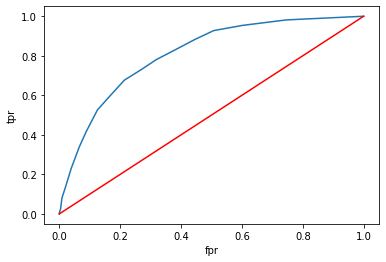

In [153]:
knn = KNeighborsClassifier(**rsearch_knn.best_params_)
knn.fit(X_trains,y_train)
y_train_pred = knn.predict(X_trains)
y_train_prob = knn.predict_proba(X_trains)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('Classification Report - Test: ',classification_report(y_test,y_test_pred))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

## stacking

Confusion Matrix - Train:  
 [[3208  383]
 [ 569  762]]
Overall Accuracy - Train:  0.8065826899634295
AUC - Train:  0.8499461568187102


Confusion Matrix - Test:  
 [[1385  187]
 [ 237  301]]
Overall Accuracy - Test:  0.7990521327014218
AUC - Test:  0.8422344561423425
Classification Report - Test:                precision    recall  f1-score   support

           0       0.85      0.88      0.87      1572
           1       0.62      0.56      0.59       538

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



Text(0, 0.5, 'tpr')

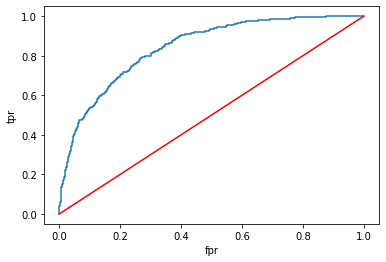

In [155]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')

lr.fit(X_trains,y_train)

y_train_pred = lr.predict(X_trains)
y_train_prob = lr.predict_proba(X_trains)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = lr.predict(X_tests)
y_test_prob = lr.predict_proba(X_tests)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('Classification Report - Test: ',classification_report(y_test,y_test_pred))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [158]:
rfc = RandomForestClassifier()

params = {'n_estimators': sp_randint(50,200),'max_features': sp_randint(1,24), 'max_depth': sp_randint(2,10)
         ,'min_samples_split': sp_randint(2,20), 'min_samples_leaf':sp_randint(1,20), 'criterion':['gini','entropy']}

rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 3, n_iter = 200, scoring='roc_auc', random_state=3, return_train_score=True)
rsearch_rfc.fit(Xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Confusion Matrix - Train:  
 [[3324  267]
 [ 632  699]]
Overall Accuracy - Train:  0.817350670459163
AUC - Train:  0.8808376228993889


Confusion Matrix - Test:  
 [[1426  146]
 [ 265  273]]
Overall Accuracy - Test:  0.8052132701421801
AUC - Test:  0.8417272056528278


Text(0, 0.5, 'tpr')

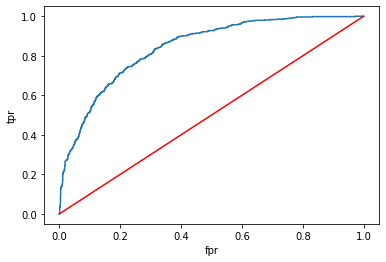

In [159]:
rfc = RandomForestClassifier(**rsearch_rfc.best_params_)

rfc.fit(X_trains,y_train)

y_train_pred = rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

## hard Voting

In [161]:
from sklearn.ensemble import VotingClassifier
lr = LogisticRegression(solver = 'liblinear')
rfc = RandomForestClassifier(**rsearch_rfc.best_params_)
knn = KNeighborsClassifier(**rsearch_knn.best_params_)

In [166]:
clg = VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)], voting = 'hard')
clg.fit(X_trains,y_train)

y_train_pred = clg.predict(X_trains)
y_test_pred = clg.predict(X_tests)

print('Accuracy score - Train', accuracy_score(y_train,y_train_pred))
print('Accuracy score - Test', accuracy_score(y_test,y_test_pred))

Accuracy score - Train 0.81511580658269
Accuracy score - Test 0.7990521327014218


## soft voting with equal weights

Confusion Matrix - Train:  
 [[3248  343]
 [ 562  769]]
Overall Accuracy - Train:  0.8161316537992686
AUC - Train:  0.86976571991796


Confusion Matrix - Test:  
 [[1391  181]
 [ 244  294]]
Overall Accuracy - Test:  0.7985781990521327
AUC - Test:  0.8388326853769971
Classification Report - Test:                precision    recall  f1-score   support

           0       0.85      0.88      0.87      1572
           1       0.62      0.55      0.58       538

    accuracy                           0.80      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Text(0, 0.5, 'tpr')

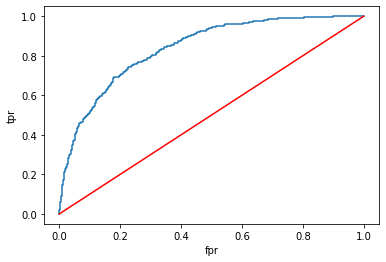

In [169]:
clf = VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)], voting = 'soft')
clf.fit(X_trains,y_train)

y_train_pred = clf.predict(X_trains)
y_train_prob = clf.predict_proba(X_trains)[:,1] ## get the prob of all three nd take average
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = clf.predict(X_tests)
y_test_prob = clf.predict_proba(X_tests)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('Classification Report - Test: ',classification_report(y_test,y_test_pred))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

Confusion Matrix - Train:  
 [[3273  318]
 [ 581  750]]
Overall Accuracy - Train:  0.817350670459163
AUC - Train:  0.8745363910653167


Confusion Matrix - Test:  
 [[1405  167]
 [ 251  287]]
Overall Accuracy - Test:  0.8018957345971564
AUC - Test:  0.838418844651286
Classification Report - Test:                precision    recall  f1-score   support

           0       0.85      0.89      0.87      1572
           1       0.63      0.53      0.58       538

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.80      2110



Text(0, 0.5, 'tpr')

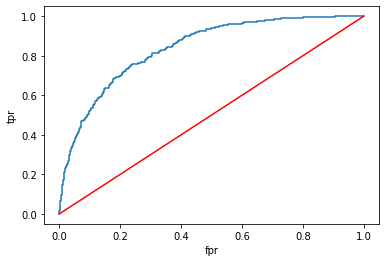

In [170]:
clf = VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],weights = [1,2,3], voting = 'soft')
clf.fit(X_trains,y_train)

y_train_pred = clf.predict(X_trains)
y_train_prob = clf.predict_proba(X_trains)[:,1] ## get the prob of all three nd take average
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

print('\n')

y_test_pred = clf.predict(X_tests)
y_test_prob = clf.predict_proba(X_tests)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('Classification Report - Test: ',classification_report(y_test,y_test_pred))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [171]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=3)

Confusion Matrix - Train:  
 [[3235  356]
 [ 575  756]]
Overall Accuracy - Train:  0.8108492482730597
AUC - Train:  0.8626860790845132


Confusion Matrix - Test:  
 [[1412  160]
 [ 245  293]]
Overall Accuracy - Test:  0.8080568720379147
AUC - Test:  0.8384466311000124
Classification Report - Test:                precision    recall  f1-score   support

           0       0.85      0.90      0.87      1572
           1       0.65      0.54      0.59       538

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



Text(0, 0.5, 'tpr')

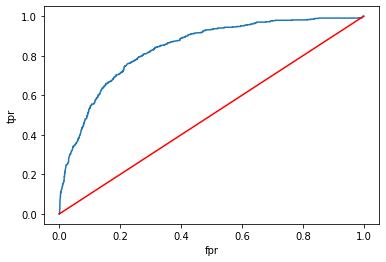

In [172]:
ada.fit(X_train,y_train)

y_train_pred = ada.predict(X_train)
y_train_prob = ada.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = ada.predict(X_test)
y_test_prob = ada.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('Classification Report - Test: ',classification_report(y_test,y_test_pred))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [173]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform
params = {'n_estimators': sp_randint(50,200), 'max_depth': sp_randint(2,15), 'Learning_rate': sp_uniform(0.001, 0.5),
         'num_leaves': sp_randint(20,50)}

rsearch = RandomizedSearchCV(lgbm, param_distributions=params, cv = 3,n_iter=200, n_jobs=-1,random_state=3)
rsearch.fit(X,y)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000011AACC9504

In [175]:
rsearch.best_params_

{'Learning_rate': 0.17795253594314642,
 'max_depth': 4,
 'n_estimators': 52,
 'num_leaves': 48}

Confusion Matrix - Train:  
 [[3267  324]
 [ 552  779]]
Overall Accuracy - Train:  0.8220235676554246
AUC - Train:  0.8826730194716276


Confusion Matrix - Test:  
 [[1408  164]
 [ 235  303]]
Overall Accuracy - Test:  0.8109004739336493
AUC - Test:  0.847227740098565
Classification Report - Test:                precision    recall  f1-score   support

           0       0.86      0.90      0.88      1572
           1       0.65      0.56      0.60       538

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110



Text(0, 0.5, 'tpr')

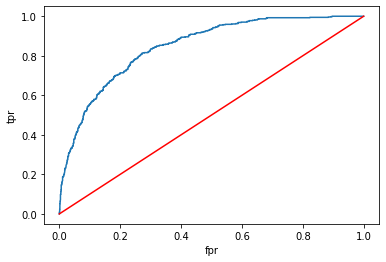

In [176]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)
lgbm.fit(X_train,y_train)

y_train_pred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))
print('\n')

y_test_pred = lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:,1]

print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_test_pred))
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))
print('Classification Report - Test: ',classification_report(y_test,y_test_pred))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('fpr')
plt.ylabel('tpr')

In [177]:
from hyperopt import fmin, tpe, hp, Trials
best = fmin(fn=lambda x: (x-1)**2, 
space=hp.uniform('x', -0.5, 2.5), 
algo=tpe.suggest, 
max_evals=50) 
print (best) 


100%|██████████| 50/50 [00:00<00:00, 178.41trial/s, best loss: 0.0002127967714359188]
{'x': 1.0145875553618802}


In [1]:
from scipy.spatial import distance

In [8]:
a = (0,3,4,5)
b = (7,6,3,-1)
dst = distance.euclidean(a,b)
dst_man = distance.cityblock(a,b)
dist_cheb = distance.chebyshev(a,b)
print(dst,'\n',dst_man,'\n',dist_cheb)

9.746794344808963 
 17 
 7


In [11]:
dst1 = distance.minkowski(a,b,3)
dst1

8.372966759705923

In [12]:
from sklearn.metrics import jaccard_similarity_score

In [13]:
a = [0,2,7,5]
b = [0,2,3,9]
similarity = jaccard_similarity_score(a,b)
print(similarity*100)

50.0


C:\Users\clicklabs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [14]:
jaccard_diss = 1-similarity
jaccard_diss

0.5

In [19]:
from sklearn.cluster import KMeans
import pandas as pd

In [20]:
data = {'x' :[15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65]}
df = pd.DataFrame(data,columns = ['x'])

In [25]:
kmeans = KMeans(n_clusters=2).fit(df)
centroid = kmeans.cluster_centers_
print(centroid)

print(kmeans.inertia_)
labels = kmeans.labels_
print(labels)

[[47.88888889]
 [19.5       ]]
1095.388888888889
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\clicklabs\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [33]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [37]:
df1 = df.loc[:,'SepalLengthCm':'PetalWidthCm']
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


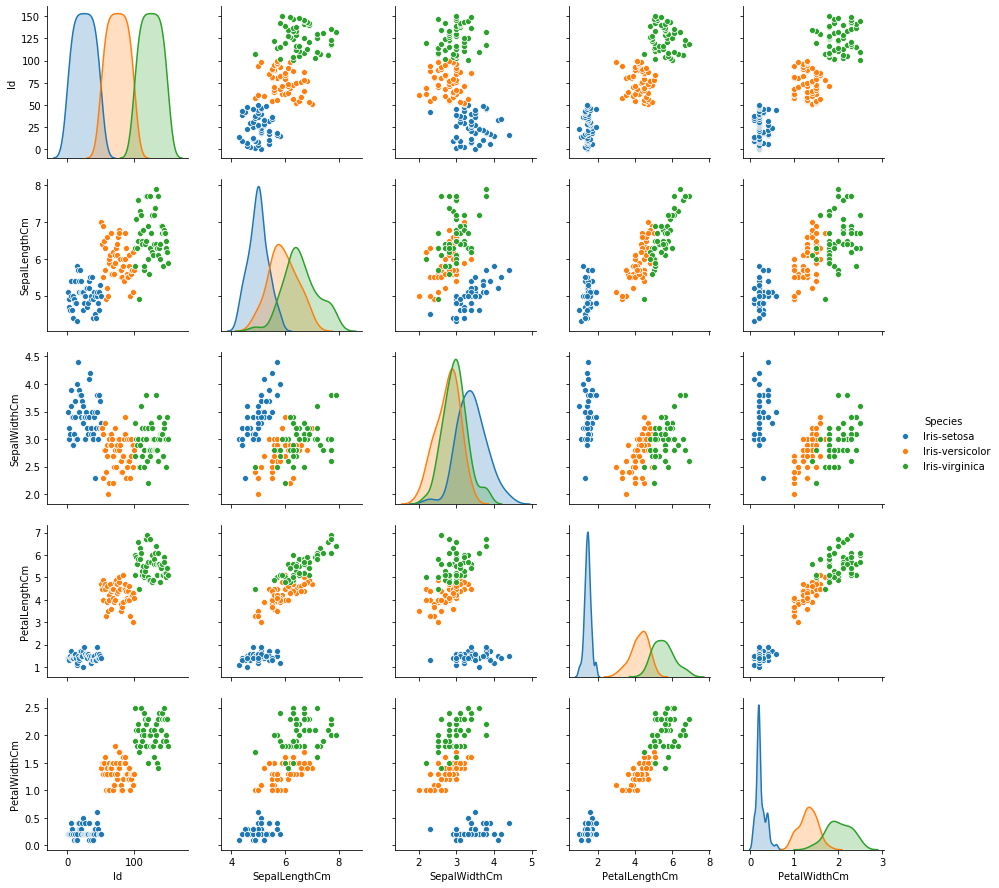

In [40]:
sns.pairplot(df,diag_kind = 'kde',hue = 'Species')

In [42]:
df_scaled = df1.apply(zscore)
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [44]:
num_cluster = range(1,15)
cluster_errors = []
for i in num_cluster:
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(df_scaled)
    cluster_errors.append(kmeans.inertia_)
df_iris = pd.DataFrame({'num':num_cluster,'error':cluster_errors})
df_iris

,num,error
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.429708
4,5,91.066771
5,6,80.230607
6,7,71.319821
7,8,62.936347
8,9,54.401405
9,10,47.315648


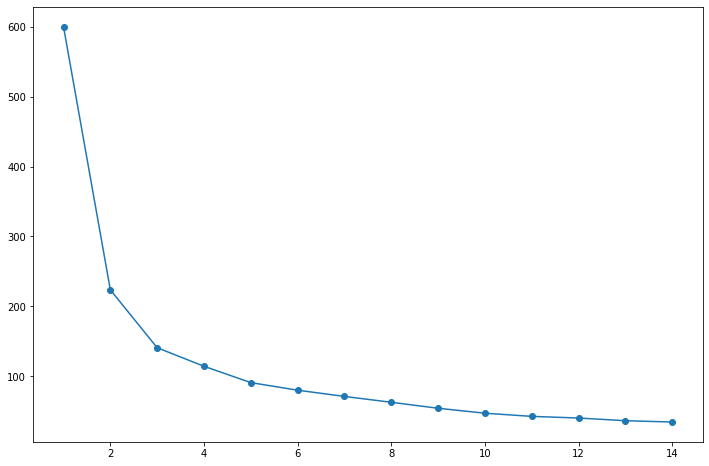

In [46]:
plt.figure(figsize = (12,8))
plt.plot(df_iris.num,df_iris.error,marker = 'o')

## we will take 3 clusters

In [50]:
kmeans = KMeans(n_clusters=3, n_init=10,random_state = 2345)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]


In [51]:
centroid_df = pd.DataFrame(centroids, columns=df_scaled.columns)
centroid_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.014579,0.842307,-1.304878,-1.255129
1,1.135970,0.096598,0.996271,1.017172
2,-0.050220,-0.880292,0.347532,0.282063


In [52]:
label = pd.DataFrame(kmeans.labels_,columns=['label'])
label

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,2
147,1
148,1


In [54]:
iris_scaled_df = df_scaled.join(label)
iris_scaled_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [55]:
iris_scaled_df.label.value_counts()

2    53
0    50
1    47
Name: label, dtype: int64

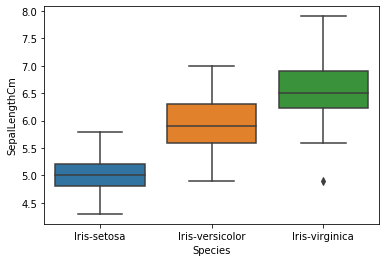

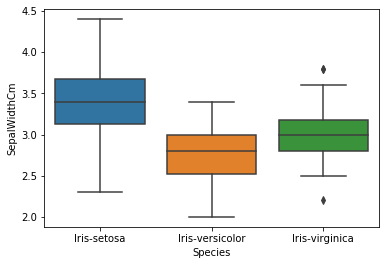

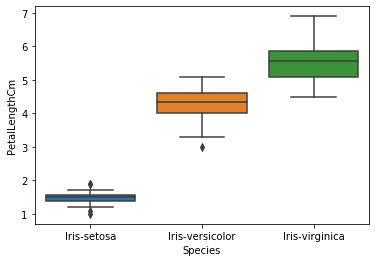

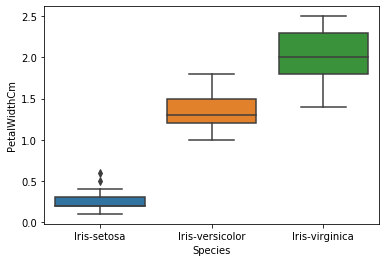

In [60]:
for col in list(df1.columns):
    sns.boxplot(df.Species,df[col])
    plt.show()

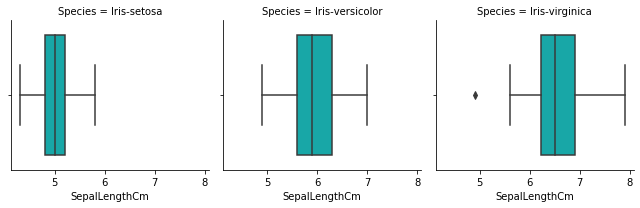

In [61]:
a = sns.FacetGrid(df,col = 'Species')
a.map(sns.boxplot, 'SepalLengthCm',color = 'c',order = [0,1,2])

In [62]:
kmeans.inertia_

140.96581663074699

In [72]:
iris_clusters = iris_scaled_df.groupby(['label'])
c0 = centroid_df.iloc[0,:]
df0 = iris_clusters.get_group(0)
I0 = 0
for i in np.arange(df0.shape[0]):
    I0 = I0 + np.sum((df0.iloc[i,:-1]-c0)**2)
    
I0 

48.48152094195994

In [74]:
iris_clusters = iris_scaled_df.groupby(['label'])
c1 = centroid_df.iloc[1,:]
df1 = iris_clusters.get_group(1)
I1 = 0
for i in np.arange(df1.shape[0]):
    I1 = I1 + np.sum((df1.iloc[i,:-1]-c1)**2)
    
I1 

47.929479870139865

In [75]:
iris_clusters = iris_scaled_df.groupby(['label'])
c2 = centroid_df.iloc[2,:]
df2 = iris_clusters.get_group(2)
I2 = 0
for i in np.arange(df2.shape[0]):
    I2 = I2 + np.sum((df2.iloc[i,:-1]-c2)**2)
    
I2

44.55481581864717

In [76]:
I = I0+I1+I2
I

140.96581663074699

In [78]:
df = pd.read_csv('HollywoodsMostProfitableStories(Homework Module 1).csv')
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability Ratio,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [79]:
df.isnull().sum()

Film                   0
Genre                  0
Lead Studio            1
Audience  score %      1
Profitability Ratio    3
Rotten Tomatoes %      1
Worldwide Gross        0
Year                   0
dtype: int64

In [80]:
data = pd.read_csv('grains.csv')
data.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,target
183,11.65,13.07,0.8575,5.108,2.850,5.209,5.135,2
169,11.24,13.00,0.8359,5.090,2.715,3.521,5.088,2
47,14.99,14.56,0.8883,5.570,3.377,2.958,5.175,0
121,18.14,16.12,0.8772,6.059,3.563,3.619,6.011,1
182,12.19,13.36,0.8579,5.240,2.909,4.857,5.158,2


In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

C:\Users\clicklabs\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [82]:
data = pd.read_csv('grains.csv')
data.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,target
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
100,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,1
24,15.01,14.76,0.8657,5.789,3.245,1.791,5.001,0
191,11.27,12.86,0.8563,5.091,2.804,3.985,5.001,2
181,12.46,13.41,0.8706,5.236,3.017,4.987,5.147,2


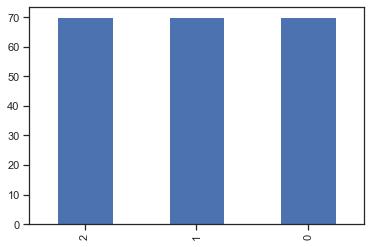

In [84]:
data.target.value_counts().plot(kind = 'bar')

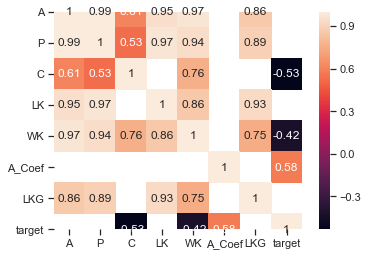

In [85]:
corr = data.corr()
sns.heatmap(corr[(corr>0.5)|(corr<-0.4)],annot = True, square = True)

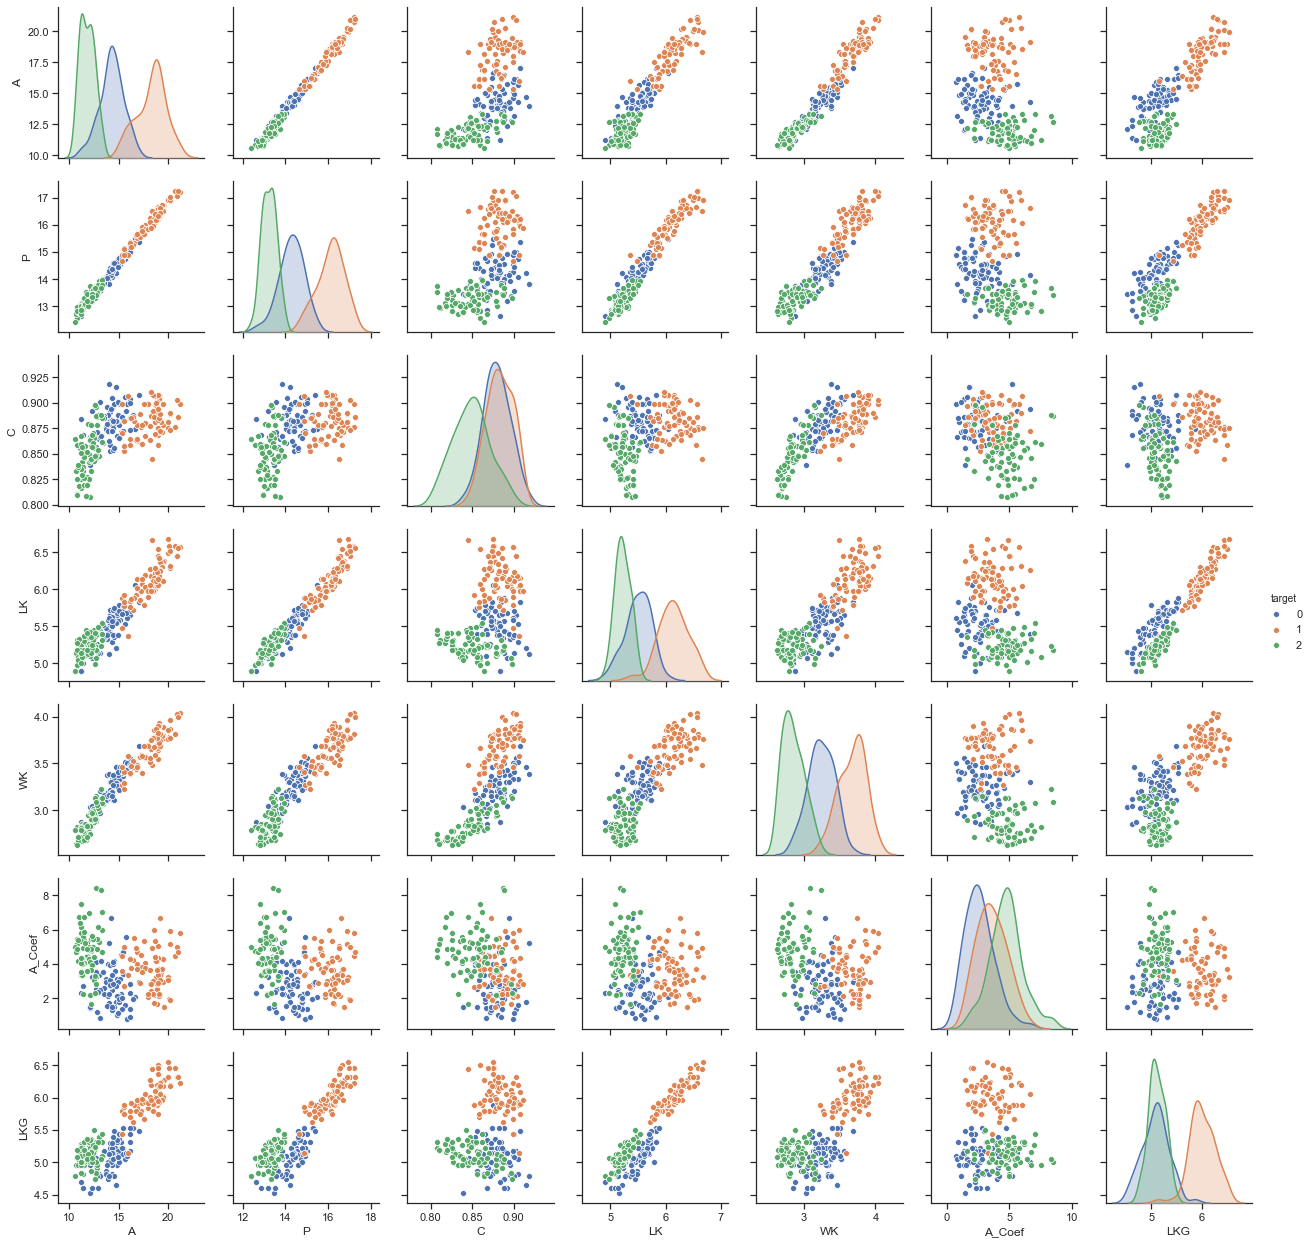

In [88]:
sns.pairplot(data,diag_kind='kde',hue = 'target',vars = ['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'])

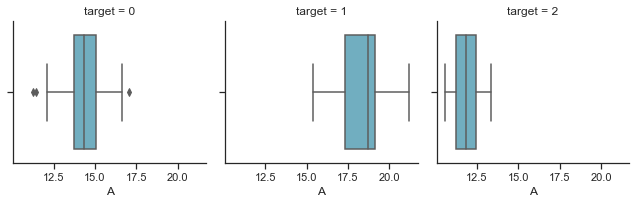

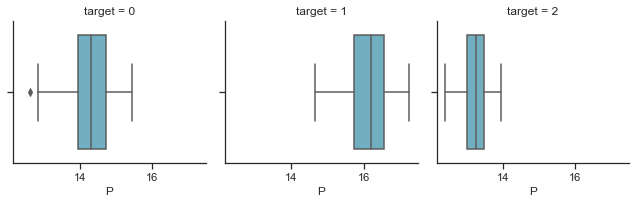

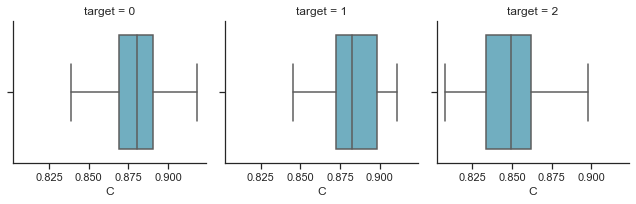

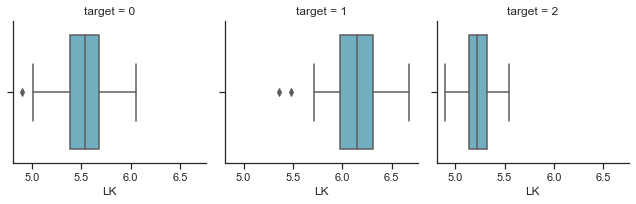

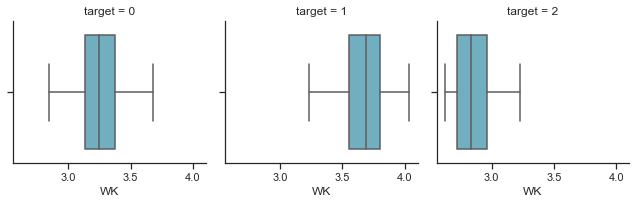

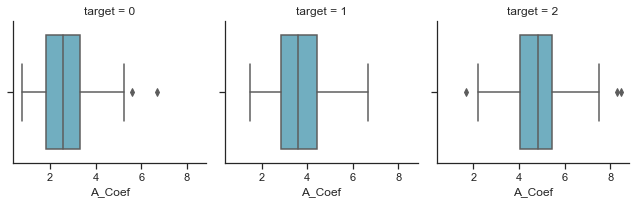

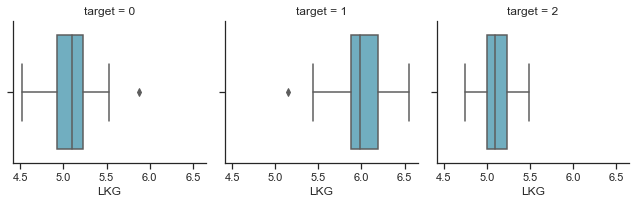

In [92]:
a = sns.FacetGrid(data,col = 'target')
a.map(sns.boxplot,'A', color = 'c',order = ['0','1','2'])

p = sns.FacetGrid(data,col = 'target')
p.map(sns.boxplot,'P', color = 'c',order = ['0','1','2'])

c = sns.FacetGrid(data,col = 'target')
c.map(sns.boxplot,'C', color = 'c',order = ['0','1','2'])

lk = sns.FacetGrid(data,col = 'target')
lk.map(sns.boxplot,'LK', color = 'c',order = ['0','1','2'])

wk = sns.FacetGrid(data,col = 'target')
wk.map(sns.boxplot,'WK', color = 'c',order = ['0','1','2'])

a_coe = sns.FacetGrid(data,col = 'target')
a_coe.map(sns.boxplot,'A_Coef', color = 'c',order = ['0','1','2'])

lkg = sns.FacetGrid(data,col = 'target')
lkg.map(sns.boxplot,'LKG', color = 'c',order = ['0','1','2'])

In [93]:
df = data.iloc[:,0:7]
df.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [94]:
df_scaled = df.apply(zscore)
df_scaled.head()

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [96]:
cluster_err = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init = 10)
    kmeans.fit(df_scaled)
    cluster_err.append(kmeans.inertia_)
cluster_df = pd.DataFrame({'k': range(1,15),'error': cluster_err})

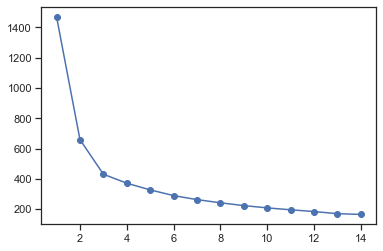

In [101]:
plt.plot(cluster_df.k,cluster_df.error,marker = 'o')

In [103]:
kmeans = KMeans(n_clusters=3,n_init=10)
cluster = kmeans.fit_predict(df_scaled)

df_k = df_scaled.copy(deep = True)
df_k['label'] = cluster
df_k.head()

,A,P,C,LK,WK,A_Coef,LKG,label
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,2
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,2
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,2
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,2
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,2


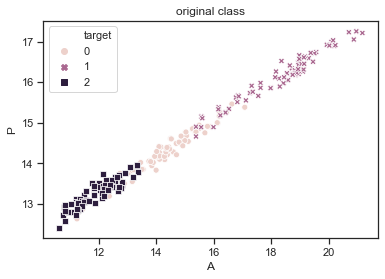

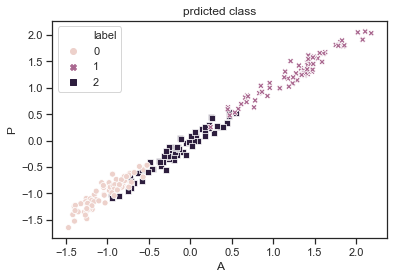

In [106]:
plt.title('original class')
sns.scatterplot('A','P',data = data,hue = 'target',style = 'target')
plt.show()
plt.title('prdicted class')
sns.scatterplot('A','P',data = df_k,hue = 'label',style = 'label')
plt.show()


In [107]:
print(data.target.value_counts())
print('*' * 30)
print(df_k.label.value_counts())

2    70
1    70
0    70
Name: target, dtype: int64
******************************
0    72
2    71
1    67
Name: label, dtype: int64


In [108]:
##Hierarchical clustering

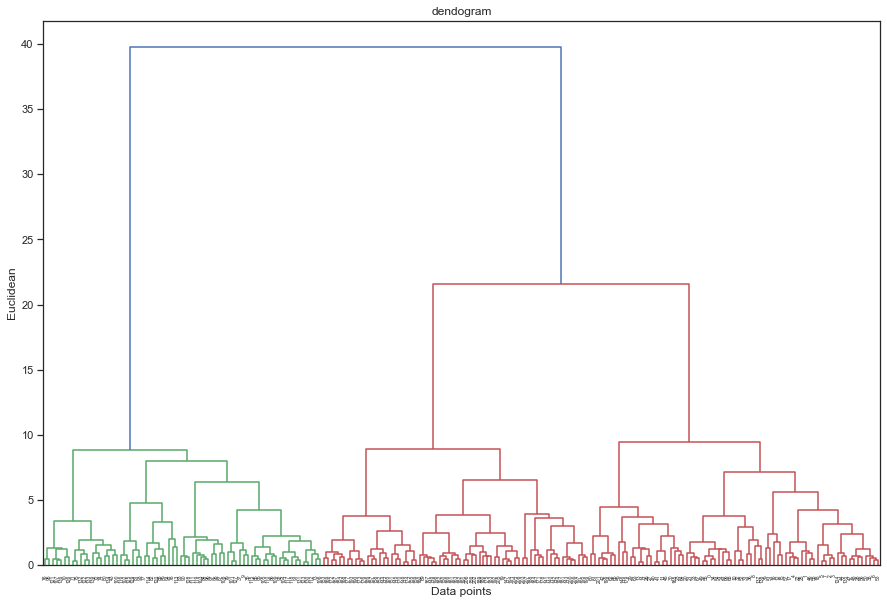

In [113]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = [15,10])
merg = linkage(df_scaled,method='ward')
dendrogram(merg,leaf_rotation = 90)
plt.title('dendogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean')
plt.show()

In [114]:
from sklearn.cluster import AgglomerativeClustering
hie_clus = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster2 = hie_clus.fit_predict(df_scaled)
df_h = df_scaled.copy(deep = True)
df_h['label'] = cluster2

In [115]:
df_h.head()

,A,P,C,LK,WK,A_Coef,LKG,label
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,0
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,0
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,0
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,0
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,0


In [116]:
print(data.target.value_counts())
print('*' * 30)
print(df_k.label.value_counts())
print('*' * 30)
print(df_h.label.value_counts())


2    70
1    70
0    70
Name: target, dtype: int64
******************************
0    72
2    71
1    67
Name: label, dtype: int64
******************************
0    73
1    70
2    67
Name: label, dtype: int64


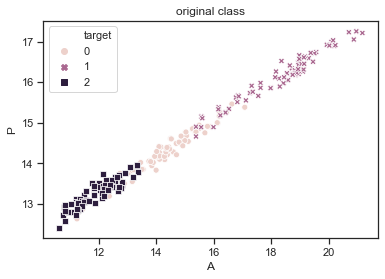

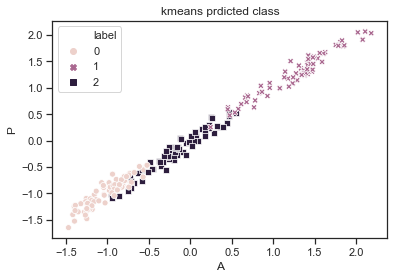

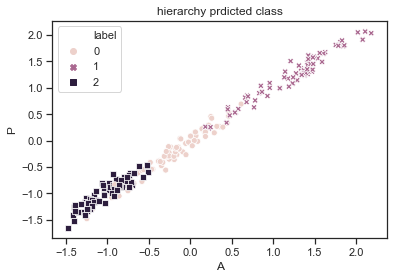

In [117]:
plt.title('original class')
sns.scatterplot('A','P',data = data,hue = 'target',style = 'target')
plt.show()
plt.title('kmeans prdicted class')
sns.scatterplot('A','P',data = df_k,hue = 'label',style = 'label')
plt.show()
plt.title('hierarchy prdicted class')
sns.scatterplot('A','P',data = df_h,hue = 'label',style = 'label')
plt.show()

In [118]:
x = df_k.drop('label',axis = 1)
y = df_k['label']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 3)

In [131]:
def model_algo(algo,X_train,y_train,X_test,y_test):
    print(algo)
    algo.fit(X_train,y_train)
    y_train_pred = algo.predict(X_train)
    print('Confusion matrix:', confusion_matrix(y_train,y_train_pred))
    print('Accuracy score:', accuracy_score(y_train,y_train_pred))
    print('\n')
    y_test_pred = algo.predict(X_test)
    print('Confusion matrix:', confusion_matrix(y_test,y_test_pred))
    print('Accuracy score:', accuracy_score(y_test,y_test_pred))
    print('Classification report:', classification_report(y_test,y_test_pred))
    print('*'*60)

In [132]:
dt = DecisionTreeClassifier(max_depth = 3,random_state=3)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5,random_state=3)
knn = KNeighborsClassifier(n_neighbors=8,metric='euclidean')

In [133]:
for i in [dt,rf,knn]:
    model_algo(i,X_train,y_train,X_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')
Confusion matrix: [[55  0  0]
 [ 0 45  0]
 [ 5  0 42]]
Accuracy score: 0.9659863945578231


Confusion matrix: [[16  0  1]
 [ 0 18  4]
 [ 5  0 19]]
Accuracy score: 0.8412698412698413
Classification report:               precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       1.00      0.82      0.90        22
           2       0.79      0.79      0.79        24

    accuracy                           0.84        63
   macro avg       0.85      0.85      0.84        63
weighted avg       0.86      0.84      0.84     

In [134]:
x1 = df_h.drop('label',axis = 1)
y1 = df_h['label']
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.3,random_state = 3)

In [135]:
for i in [dt,rf,knn]:
    model_algo(i,X_train,y_train,X_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')
Confusion matrix: [[46  0  2]
 [ 2 46  0]
 [ 0  0 51]]
Accuracy score: 0.9727891156462585


Confusion matrix: [[24  1  0]
 [ 3 19  0]
 [ 1  0 15]]
Accuracy score: 0.9206349206349206
Classification report:               precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.95      0.86      0.90        22
           2       1.00      0.94      0.97        16

    accuracy                           0.92        63
   macro avg       0.94      0.92      0.93        63
weighted avg       0.93      0.92      0.92     

In [136]:
from numpy.linalg import eig

In [138]:
A = np.array([[2.5,2.4],[0.5,0.7],[2.2,2.9],[1.9,2.2],[3.1,3],[2.3,2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])
print(A)

[[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]


In [140]:
M = np.mean(A,axis = 0)
M

array([1.81, 1.91])

In [143]:
C = A-M
cov = np.cov(C.T)
cov

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

In [146]:
values,vector = eig(cov)
print(vector)
print('\n')
print(values)

[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


[0.0490834  1.28402771]


In [149]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
iris = datasets.load_iris()
X = iris.data
X_std = StandardScaler().fit_transform(X)

In [153]:
cov_matrix = np.cov(X_std.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [154]:
values, vector = np.linalg.eig(cov_matrix)
print(values)
print('\n')
print(vector)

[2.93808505 0.9201649  0.14774182 0.02085386]


[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [157]:
total = np.sum(values)
var_exp = [(i/total)*100 for i in values]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[ 72.96244541  95.8132072   99.48212909 100.        ]


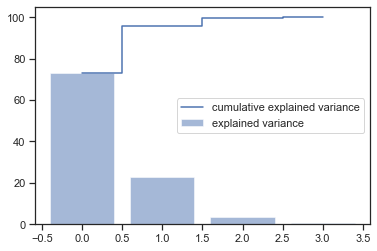

In [163]:
plt.figure(figsize = (6,4))
plt.bar(range(4),var_exp,label = 'explained variance',alpha = 0.5)
plt.step(range(4),cum_var_exp,label = 'cumulative explained variance',where='mid')
plt.legend()

In [210]:
df = pd.read_csv('wines.csv') 
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [211]:
df.Wine.value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [212]:
X = df.drop('Wine',axis = 1)
y = df['Wine']

In [213]:
y.shape

(178,)

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [215]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [170]:
from sklearn.decomposition import PCA
pca = PCA()
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

In [171]:
pca.explained_variance_ratio_

array([0.36033176, 0.20221305, 0.11215914, 0.07415504, 0.06598168,
       0.04530596, 0.03659911, 0.02711327, 0.02126148, 0.01881188,
       0.01491305, 0.01285965, 0.00829493])

Text(0, 0.5, 'explained variance')

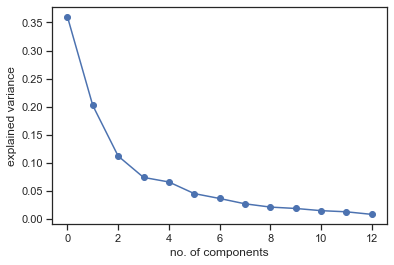

In [174]:
plt.plot(pca.explained_variance_ratio_,marker = 'o')
plt.xlabel('no. of components')
plt.ylabel('explained variance')

In [175]:
cov_matrix = np.cov(X_train.T)
cov_matrix

array([[ 1.00813008,  0.11805891,  0.26860784, -0.2624643 ,  0.30468574,
         0.19621217,  0.15521071, -0.05288439,  0.07461877,  0.5604629 ,
        -0.07811147, -0.00325578,  0.63903664],
       [ 0.11805891,  1.00813008,  0.21618081,  0.34174857, -0.0616119 ,
        -0.3470623 , -0.41678377,  0.24861044, -0.17032057,  0.28762614,
        -0.63395974, -0.37100483, -0.1851159 ],
       [ 0.26860784,  0.21618081,  1.00813008,  0.51429946,  0.29967564,
         0.11229538,  0.10330259,  0.2132758 , -0.01249682,  0.34271479,
        -0.1788562 , -0.05775299,  0.25751237],
       [-0.2624643 ,  0.34174857,  0.51429946,  1.00813008, -0.06799314,
        -0.31941379, -0.3239595 ,  0.39243359, -0.13132752,  0.10059726,
        -0.38559013, -0.30464849, -0.38206721],
       [ 0.30468574, -0.0616119 ,  0.29967564, -0.06799314,  1.00813008,
         0.24831358,  0.22270718, -0.32953843,  0.24896151,  0.19659565,
         0.10257865,  0.12615648,  0.45674496],
       [ 0.19621217, -0.347062

In [178]:
values,vectors = np.linalg.eig(cov_matrix)
print(values)

[4.72239672 2.65014177 1.469923   0.97185309 0.86473551 0.5937659
 0.47965669 0.1087108  0.35533811 0.16853458 0.19544581 0.27864645
 0.24654264]


In [180]:
total = np.sum(values)
var_exp = [(i/total)*100 for i in values]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 36.03317596,  56.254481  ,  67.47039471,  74.88589907,
        81.48406702,  86.0146629 ,  89.67457436,  90.50406745,
        93.21539424,  94.50135908,  95.99266393,  98.11881238,
       100.        ])

In [216]:
len(X.columns)
from sklearn.linear_model import LogisticRegression

In [220]:
for i in range(1,X.shape[1]+1):
    print('with n_comonents:',i)
    pca = PCA(n_components=i)
    X_train2 = pca.fit_transform(X_train)
    X_test2 = pca.transform(X_test)
    lr = LogisticRegression(random_state = 0)
    lr.fit(X_train2,y_train)
    y_test_pred = lr.predict(X_test2)
    print('confusion matrix :', confusion_matrix(y_test,y_test_pred))
    print('Accuracy score :', accuracy_score(y_test,y_test_pred))
    print('*'*60)

with n_comonents: 1
confusion matrix : [[18  5  0]
 [ 4 14  1]
 [ 0  1 11]]
Accuracy score : 0.7962962962962963
************************************************************
with n_comonents: 2
confusion matrix : [[21  2  0]
 [ 1 17  1]
 [ 0  0 12]]
Accuracy score : 0.9259259259259259
************************************************************
with n_comonents: 3
confusion matrix : [[21  2  0]
 [ 1 17  1]
 [ 0  0 12]]
Accuracy score : 0.9259259259259259
************************************************************
with n_comonents: 4
confusion matrix : [[20  3  0]
 [ 1 17  1]
 [ 0  0 12]]
Accuracy score : 0.9074074074074074
************************************************************
with n_comonents: 5
confusion matrix : [[21  2  0]
 [ 0 18  1]
 [ 0  0 12]]
Accuracy score : 0.9444444444444444
************************************************************
with n_comonents: 6
confusion matrix : [[23  0  0]
 [ 0 18  1]
 [ 0  0 12]]
Accuracy score : 0.9814814814814815
***********************

In [200]:
y_train.shape

(124,)

In [224]:
pca = PCA(n_components=i)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

In [225]:
pd.DataFrame(pca.components_,columns = X.columns)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,-0.081002,0.259907,0.043500,0.245491,-0.154709,-0.382903,-0.414719,0.299067,-0.301320,0.139731,-0.334082,-0.384061,-0.249629
1,0.481784,0.193825,0.382930,0.047804,0.325753,0.101300,0.045410,0.020536,0.064481,0.489001,-0.213142,-0.110371,0.402049
2,-0.288751,0.141335,0.510462,0.621725,0.051920,0.169521,0.198626,0.112489,0.247157,-0.162938,-0.028736,0.195584,-0.198194
3,-0.070265,0.543925,-0.326101,-0.070015,0.041941,0.033203,0.011976,-0.464255,0.384874,0.054960,-0.412186,0.085176,-0.202797
4,-0.222347,-0.153060,0.046139,0.101557,0.762524,-0.253714,-0.207839,-0.395578,-0.149671,-0.134127,0.103749,-0.132781,-0.020314
5,-0.219028,-0.509559,-0.222594,0.123485,0.049195,0.042017,-0.013770,0.140347,0.547480,0.428371,-0.083159,-0.323759,-0.092399
6,0.110076,0.340277,-0.181982,-0.099244,0.301511,-0.179755,-0.142019,0.547152,0.439339,-0.305570,0.289067,-0.028326,0.124933
7,-0.344402,0.049922,-0.030563,-0.364529,0.349639,0.509263,0.108062,0.388261,-0.268218,0.003848,-0.336892,-0.007007,-0.124737
8,0.597955,-0.242492,-0.138754,0.113902,0.226317,-0.014718,0.031237,0.126202,-0.043955,-0.033576,-0.134089,0.292612,-0.613532
9,0.108356,0.258397,0.134202,-0.117792,-0.013038,0.285476,0.110696,-0.141208,-0.023172,0.132893,0.532102,-0.518746,-0.453121
